# **Project Work on Regression**

### **Task**
- The objective of this project is to predict 'sale'.


### **Import Libraries**

In [1]:
## Pandas
import pandas as pd
## Numpy
import numpy as np
## seaborn
import seaborn as sns


## Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

## Models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

## Regression Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Set global scikit-learn configuration 
from sklearn import set_config

### **Functions**

  **Metrics for X_train**

  mae = mean_absolute_error(y_train, model_pipeline.predict(x_train))

  mse = mean_squared_error(y_train, model_pipeline.predict(x_train))

  rmse = np.sqrt(mean_squared_error(y_train, model_pipeline.predict(x_train)))

  r2 = r2_score(y_train, model_pipeline.predict(x_train))






**Metrics for X_test**

  mae = mean_absolute_error(y_test, model_pipeline.predict(x_test))

  mse = mean_squared_error(y_test, model_pipeline.predict(x_test))

  rmse = np.sqrt(mean_squared_error(y_test, model_pipeline.predict(x_test)))

  r2 = r2_score(y_test, model_pipeline.predict(x_test))

In [2]:
## Create a function to take the true and predicted values
## and print MAE, MSE, RMSE, and R2 metrics for a model
def model_metrics(pipe, x_train, y_train, x_test, y_test, 
                       model_name='Regression Model', ):
  ## Train
  mae = round(mean_absolute_error(y_train, pipe.predict(x_train)),4)
  mse = round(mean_squared_error(y_train, pipe.predict(x_train)),4)
  rmse = round(np.sqrt(mean_squared_error(y_train, pipe.predict(x_train))),4)
  r2 = round(r2_score(y_train, pipe.predict(x_train)),6)
  print(f'{model_name} Train Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

  ## Test
  mae = round(mean_absolute_error(y_test, pipe.predict(x_test)),4)
  mse = round(mean_squared_error(y_test, pipe.predict(x_test)),4)
  rmse = round(np.sqrt(mean_squared_error(y_test, pipe.predict(x_test))),4)
  r2 = round(r2_score(y_test, pipe.predict(x_test)),6)

  # Display the metrics for the model
  print(f'{model_name} Test Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

## **1. Load and inspect the data**

### **Load the Data**

In [3]:
## Load Data
df = pd.read_csv(r"C:\Users\USER\Desktop\sales_predictions (4).csv")

### **Inspect the Data**

In [4]:
## Display the first (5) rows of the dataframe
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


- The data appears to have loaded correctly.

In [5]:
## Display the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 8523 rows, and 12 columns.
The rows represent 8523 observations, and the columns represent 11 features and 1 target variable.


In [6]:
## Display the column names and datatypes for each column
## Columns with mixed datatypes are identified as an object datatype
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
## Display the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
## Display the descriptive statistics for the numeric columns
df.describe(include="number") # or 'object'

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
## Display the descriptive statistics for the non-numeric columns
df.describe(exclude="number") # or 'object'

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


## **2. Clean the Data**

### **Remove Unnecessary Columns**

- There are no columns to be dropped.

### **Remove Unecessary Rows**

#### **Duplicates**

In [10]:
## Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


In [11]:
## Drop duplicate rows
df = df.drop_duplicates()

In [12]:
## Confirm duplicate rows have been dropped
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


### **Inspect Column Datatypes for Errors**

In [13]:
## Display column names and datatypes
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- All collumns appear to have the appropriate data types.

### **Inspect Column Names for Errors**


- Check for common syntax errors which may include extra white spaces at the beginning or end of strings or column names.

- Check for typos or inconsistencies in strings that need to be fixed.(example: cat, Cat, cats)

In [14]:
## Display column names
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

- No errors noted.

### **Inspect Values for Errors**

#### **Numeric Columns**

- Check for unusual or impossible values. (Example a weight, or height that is negative in value.)

In [15]:
## Display the descriptive statistics for the non-numeric columns
df.describe(include="number")

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


- No unusual values noted.

#### **Categorical Columns**

- No unusual values noted.

### **Missing Values**

In [16]:
## Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 3873 missing values.


In [17]:
## Display the count of missing values by column
print(df.isna().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [18]:
## Display the percentage of missing values by column
print(df.isna().sum()/len(df)*100)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


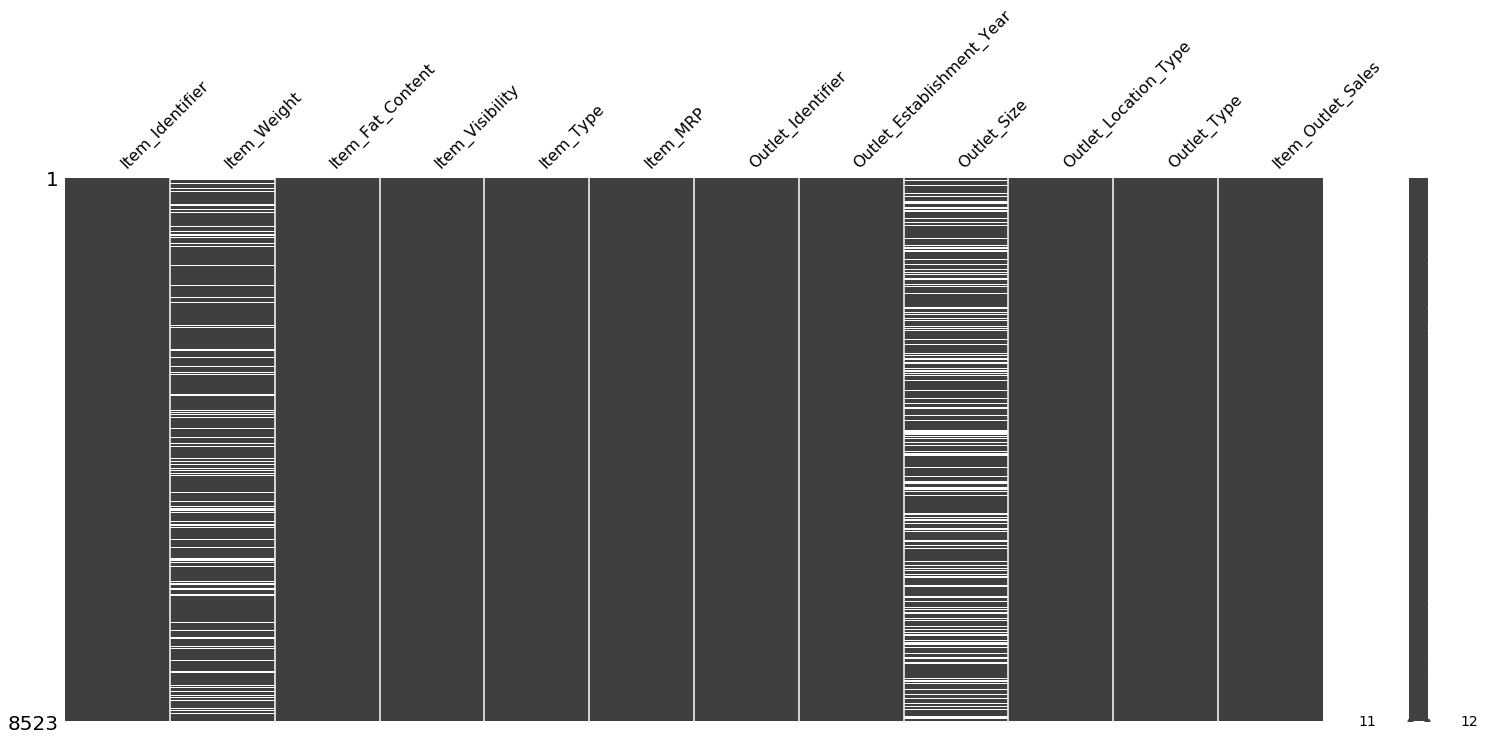

In [20]:
import missingno as msno
msno.matrix(df)

- There are missing values we will need to impute the mean and mode. 
 - We will not need to use SimpleImputer in our preprocessing steps.

- **Never use fillna() to impute values prior to Train_Test_Split, as it would cause data leakage**

In [21]:
df.drop(["Item_Identifier"], axis  =  1, inplace = True)

In [22]:
# I will replace missing value in items_weight column with the mean, since it is a column with numrical value
mean = df['Item_Weight'].mean()
df['Item_Weight'].fillna(mean, inplace=True)

In [23]:
# There are 2410 missing value for outlet_size column, dropping them will result to much loss of our data. 
# We will use ffil method to replace missing value
df['Outlet_Size'].fillna(method='ffill', inplace=True)

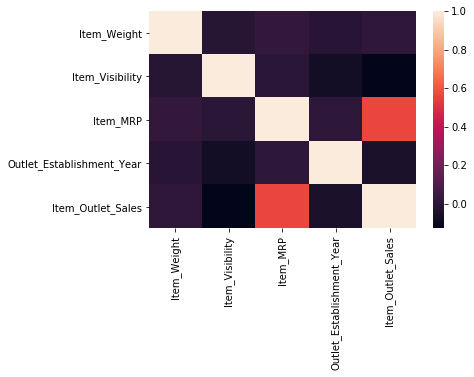

In [42]:
sns.heatmap(df.corr(), annot = False)

## **3. Split the Data**



In [24]:
## Define features (X) and target (y)
target = 'Item_Outlet_Sales'
X = df.drop(columns = [target]).copy()
y = df[target].copy()


In [25]:
## Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## **4. Prepare the Data**

### **Identify the datatypes for each feature**


### **ColumnSelector**


In [26]:
## Instantiate the column selectors
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

### **Imputers**

- Not required, there are no missing values in this dataset to be imputed.

### **Transformers**



In [27]:
## Instantiate the transformers
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

### **Tuples**

In [28]:
## Create tuples
number_tuple = (scaler, num_selector)
category_tuple = (ohe, cat_selector)

### **ColumnTransformer**


In [29]:
## Create the preprocessor using make_column_transformer
preprocessor = make_column_transformer(number_tuple, 
                                       category_tuple, 
                                       remainder='drop')

## **5. Model the Data**

### **Baseline Model**
- Instantiate the baseline model using the 'mean' strategy.
- Create a model pipeline using the preprocessor and model.
- Fit the model pipeline with the X_train dataset.(Never fit on X_test.)


In [49]:
## Create an instance of the model
dummy = DummyRegressor(strategy='mean')

## Create a model pipeline
dummy_pipe = make_pipeline(preprocessor, dummy)

## Fit the model
dummy_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001869BC0E308>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001869BC0E4C8>)])),
                ('dummyregressor', DummyRegressor())])

#### **Metrics**


In [50]:
## Display model performance metrics using a function
model_metrics(dummy_pipe, x_train=X_train, y_train=y_train, 
                          x_test=X_test, y_test=y_test, 
                           model_name='Dummy Model')

Dummy Model Train Scores
MAE: 1,360.2184 
MSE: 2,959,455.7045 
RMSE: 1,720.3069 
R2: 0.0000

Dummy Model Test Scores
MAE: 1,326.1210 
MSE: 2,772,144.4627 
RMSE: 1,664.9758 
R2: -0.0048



### **Linear Regression Model**
- Instantiate the model.
- Create a model pipeline using the preprocessor and model.
- Fit the model pipeline on the X_train dataset. (Never fit on X_test.)


In [51]:
## Create an instance of the model
lin_reg = LinearRegression()

## Create a model pipeline
lin_reg_pipe = make_pipeline(preprocessor, lin_reg)

## Fit the model
lin_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001869BC0E308>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001869BC0E4C8>)])),
                ('linearregression', LinearRegression())])

#### **Metrics**

In [52]:
## Display model performance metrics using a function
model_metrics(lin_reg_pipe, x_train=X_train, y_train=y_train, 
                          x_test=X_test, y_test=y_test, 
                           model_name='Linear Regression')

Linear Regression Train Scores
MAE: 847.1955 
MSE: 1,297,153.4539 
RMSE: 1,138.9264 
R2: 0.5617

Linear Regression Test Scores
MAE: 804.1612 
MSE: 1,194,862.5341 
RMSE: 1,093.0977 
R2: 0.5669



### **Decision Tree Model**

In [53]:
## Import the model
from sklearn.tree import DecisionTreeRegressor

In [54]:
## Create an instance of the model
dec_tree = DecisionTreeRegressor()

## Create a model pipeline
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)

## Fit the model
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001869BC0E308>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001869BC0E4C8>)])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [55]:
## Display model performance metrics using a function
model_metrics(dec_tree_pipe, x_train=X_train, y_train=y_train, 
                          x_test=X_test, y_test=y_test, 
                           model_name='Decision Tree Model')

Decision Tree Model Train Scores
MAE: 0.0000 
MSE: 0.0000 
RMSE: 0.0000 
R2: 1.0000

Decision Tree Model Test Scores
MAE: 1,043.9544 
MSE: 2,243,273.0166 
RMSE: 1,497.7560 
R2: 0.1869



### **Bagged Tree Model**

In [56]:
## Import the model
from sklearn.ensemble import BaggingRegressor

In [57]:
# Create an instance of the model
bag_tree = BaggingRegressor()

# Create a model pipeline
bag_tree_pipe = make_pipeline(preprocessor, bag_tree)

# Fit the model
bag_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001869BC0E308>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001869BC0E4C8>)])),
                ('baggingregressor', BaggingRegressor())])

In [58]:
## Display model performance metrics using a function
model_metrics(bag_tree_pipe, x_train=X_train, y_train=y_train, 
                          x_test=X_test, y_test=y_test, 
                           model_name='Bagged Tree Model')

Bagged Tree Model Train Scores
MAE: 322.7450 
MSE: 248,088.6065 
RMSE: 498.0849 
R2: 0.9162

Bagged Tree Model Test Scores
MAE: 788.3592 
MSE: 1,315,890.8594 
RMSE: 1,147.1229 
R2: 0.5231



### **Random Forest Model**

In [59]:
## Import the model
from sklearn.ensemble import RandomForestRegressor

In [60]:
## Create an instance of the model
ran_for = RandomForestRegressor()

## Create a model pipeline
ran_for_pipe = make_pipeline(preprocessor, ran_for)

## Fit the model
ran_for_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001869BC0E308>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001869BC0E4C8>)])),
                ('randomforestregressor', RandomForestRegressor())])

In [61]:
## Display model performance metrics using a function
model_metrics(ran_for_pipe, x_train=X_train, y_train=y_train, 
                          x_test=X_test, y_test=y_test, 
                           model_name='Random Forest Model')

Random Forest Model Train Scores
MAE: 296.4965 
MSE: 183,061.2811 
RMSE: 427.8566 
R2: 0.9381

Random Forest Model Test Scores
MAE: 772.2054 
MSE: 1,231,724.4589 
RMSE: 1,109.8308 
R2: 0.5536



## **Recommendations**

Now I have tried four (4) several different models on the data set. You now need to determine which model to implement.

- Overall, which model do you recommend?
- Justify your recommendation.

**Model recommended:** Random Forest

- It had the lowest error scores for RMSE, and it had the hightest R2 on the Test dataset comparing linear, decision tree, bagged tree and random forest.

**Random Forest Model Test Scores**
- RMSE: 1109.6987 
- R2: 0.5536
